## ML Lab 3

1. Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing. 
1. Load data in Pandas. 
2. Drop columns that aren’t useful. 
3. Drop rows with missing values. 
4. Create dummy variables. 
5. Take care of missing data. 
6. Convert the data frame to NumPy. 
7. Divide the data set into training data and test data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('diabetes_csv.csv')
df = df[
    (df['Glucose'] > 0) &
    (df['BloodPressure'] > 0) &
    (df['SkinThickness'] > 0) &
    (df['Insulin'] > 0) &
    (df['BMI'] > 0)
]
df.to_csv('diabetes_cleaned_v1.csv')

In [5]:
arr=df.to_numpy()

print(arr)
print(type(arr))

[[  1.     89.     66.    ...   0.167  21.      0.   ]
 [  0.    137.     40.    ...   2.288  33.      1.   ]
 [  3.     78.     50.    ...   0.248  26.      1.   ]
 ...
 [  2.     88.     58.    ...   0.766  22.      0.   ]
 [ 10.    101.     76.    ...   0.171  63.      0.   ]
 [  5.    121.     72.    ...   0.245  30.      0.   ]]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
df=pd.read_csv('diabetes_cleaned_v1.csv')
X= df.drop('Outcome', axis=1)  # features
y = df['Outcome']               # target (label)



In [9]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size=0.2, random_state=42
)


print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (313, 8)
Test size: (79, 8)


2. a.  Construct a CSV file with the following attributes: 
Study time in hours of ML lab course (x) 
Score out of 10 (y) 
The dataset should contain 10 rows. 
   b.  Create a regression model and display the following: 
Coefficients: B0 (intercept) and B1 (slope) 
RMSE (Root Mean Square Error) 
Predicted responses 

Formula: 
$$
B_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

$$
B_0 = \bar{y} - B_1 \bar{x}
$$

  c.  Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color. 
  d.  Implement the model using two methods: 
Pedhazur formula (intuitive) 
Calculus method (partial derivatives, refer to class notes) 
 e.  Compare the coefficients obtained using both methods and compare them with the analytical solution. 
 f. Test your model to predict the score obtained when the study time of a student is 10 hours. 
 (Do not use scikit-learn.)

In [10]:

data = {
    'StudyTime': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score_on_10': [3, 4, 5, 6, 7, 7.5, 8, 9, 9.5, 10]
}

df = pd.DataFrame(data)
df.to_csv('ml_lab_scores.csv', index=False)


Pedhazur method:
Intercept (B0): 2.6333, Slope (B1): 0.7758, RMSE: 0.2741

Calculus method:
Intercept (B0): 2.6333, Slope (B1): 0.7758, RMSE: 0.2741

Predicted score for 10 hours of study: 10.39


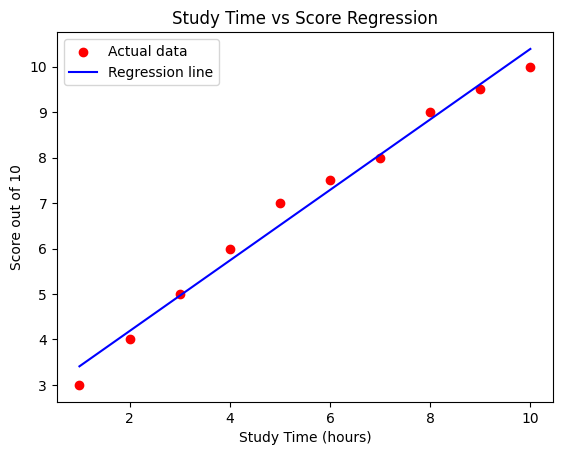

In [13]:


x = df['StudyTime'].values
y = df['Score_on_10'].values

# Pedhazur method
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

B1_pedhazur = numerator / denominator
B0_pedhazur = y_mean - B1_pedhazur * x_mean

y_pred_pedhazur = B0_pedhazur + B1_pedhazur * x
rmse_pedhazur = np.sqrt(np.mean((y - y_pred_pedhazur) ** 2))

# Calculus method
n = len(x)
A = np.array([[n, np.sum(x)],
              [np.sum(x), np.sum(x ** 2)]])
B = np.array([np.sum(y), np.sum(x * y)])

B0_calc, B1_calc = np.linalg.solve(A, B)

y_pred_calc = B0_calc + B1_calc * x
rmse_calc = np.sqrt(np.mean((y - y_pred_calc) ** 2))

# Print comparison
print("Pedhazur method:")
print(f"Intercept (B0): {B0_pedhazur:.4f}, Slope (B1): {B1_pedhazur:.4f}, RMSE: {rmse_pedhazur:.4f}")

print("\nCalculus method:")
print(f"Intercept (B0): {B0_calc:.4f}, Slope (B1): {B1_calc:.4f}, RMSE: {rmse_calc:.4f}")

# Predict for 10 hours
study_time = 10
predicted_score = B0_pedhazur + B1_pedhazur * study_time
print(f"\nPredicted score for {study_time} hours of study: {predicted_score:.2f}")

# Plot
plt.scatter(x, y, color='red', label='Actual data')
plt.plot(x, y_pred_pedhazur, color='blue', label='Regression line')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score out of 10')
plt.title('Study Time vs Score Regression')
plt.legend()
plt.show()


Additional Question 
1.  a. Consider the hepatitis/diabetes CSV file. Create a regression model and display the following: 
 Coefficients: B0 (intercept) and B1 (slope) 
 RMSE (Root Mean Square Error) 
 Predicted responses 
b. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color. 
c. Implement the model using two methods: 
1. Pedhazur formula (intuitive) 
2. Calculus method (partial derivatives, refer to class notes) 
d. Compare the coefficients obtained using both methods. For a given data point, check the predicted y 
value. 
( Do not use scikit-learn.) 


In [ ]:
df=pd.read_csv('diabetes_cleaned_v1.csv')

x = df['StudyTime'].values
y = df['Score_on_10'].values

# Pedhazur method
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

B1_pedhazur = numerator / denominator
B0_pedhazur = y_mean - B1_pedhazur * x_mean

y_pred_pedhazur = B0_pedhazur + B1_pedhazur * x
rmse_pedhazur = np.sqrt(np.mean((y - y_pred_pedhazur) ** 2))
